<a href="https://colab.research.google.com/github/melissatorgbi/Models/blob/main/YOLOv3_colab_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


========================================================<br>
<br>
   File name   : YOLOv3_colab_training.ipynb<br>
   Author      : PyLessons<br>
   Created date: 2020-05-26<br>
   Website     : https://pylessons.com/YOLOv3-TF2-GoogleColab<br>
   GitHub      : https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3<br>
   Description : Train custom model on Google colab tutorial<br>
<br>
================================================================


**Open this notebook from google drive**<br>
**Go to "Edit" -> "Notebook settings" and enable GPU.**


In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Fri Sep 11 23:47:36 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    27W /  70W |   8309MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Connect and authorize google drive with google colab:**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
checkpoints	     LICENSE		README.md
deep_sort	     log		requirements.txt
detection_custom.py  mAP		tools
detection_demo.py    mnist		train.py
detect_mnist.py      model_data		yolov3
evaluate_mAP.py      object_tracker.py	YOLOv3_colab_training.ipynb
IMAGES		     __pycache__


In [ ]:
%cp -av "/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3-master.zip" "TensorFlow-2.x-YOLOv3-master.zip"

'/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3-master.zip' -> 'TensorFlow-2.x-YOLOv3-master.zip'


In [ ]:
!unzip TensorFlow-2.x-YOLOv3-master.zip

Archive:  TensorFlow-2.x-YOLOv3-master.zip
df60cf3392a7e787874f2891931506a782c6853f
   creating: TensorFlow-2.x-YOLOv3-master/
   creating: TensorFlow-2.x-YOLOv3-master/IMAGES/
 extracting: TensorFlow-2.x-YOLOv3-master/IMAGES/city.jpg  
  inflating: TensorFlow-2.x-YOLOv3-master/IMAGES/city_pred.jpg  
  inflating: TensorFlow-2.x-YOLOv3-master/IMAGES/kite.jpg  
  inflating: TensorFlow-2.x-YOLOv3-master/IMAGES/kite_pred.jpg  
  inflating: TensorFlow-2.x-YOLOv3-master/IMAGES/mnist_test.jpg  
  inflating: TensorFlow-2.x-YOLOv3-master/IMAGES/street.jpg  
  inflating: TensorFlow-2.x-YOLOv3-master/IMAGES/street_pred.jpg  
  inflating: TensorFlow-2.x-YOLOv3-master/IMAGES/tensorboard.png  
 extracting: TensorFlow-2.x-YOLOv3-master/IMAGES/test.mp4  
  inflating: TensorFlow-2.x-YOLOv3-master/IMAGES/tracking_results.gif  
  inflating: TensorFlow-2.x-YOLOv3-master/LICENSE  
  inflating: TensorFlow-2.x-YOLOv3-master/README.md  
  inflating: TensorFlow-2.x-YOLOv3-master/YOLOv3_colab_training.ipynb  
 

**Open our project "TensorFlow-2.x-YOLOv3" direcotry in google drive:**

In [ ]:
#%cd gdrive/My\ Drive/TensorFlow-2.x-YOLOv3/

%cd /content/TensorFlow-2.x-YOLOv3-master
!ls

/content/TensorFlow-2.x-YOLOv3-master
checkpoints	     LICENSE		README.md
deep_sort	     log		requirements.txt
detection_custom.py  mAP		TensorFlow-2.x-YOLOv3-master.zip
detection_demo.py    mnist		tools
detect_mnist.py      model_data		train.py
evaluate_mAP.py      object_tracker.py	yolov3
IMAGES		     __pycache__	YOLOv3_colab_training.ipynb


**Install all required libraries for our project:**

In [ ]:
!pip install -r ./requirements.txt

     |████████████████████████████████| 516.2MB 30kB/s 
     |████████████████████████████████| 61kB 57kB/s 
     |████████████████████████████████| 1.3MB 48.1MB/s 
     |████████████████████████████████| 3.0MB 44.5MB/s 
     |████████████████████████████████| 460kB 50.4MB/s 
     |████████████████████████████████| 6.6MB 44.5MB/s 
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=0bc8199b17ef5fd63fa69c338b8712c527eb9547dae91471116b9d52cd41eb6e
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
  Created wheel for awscli: filename=awscli-1.18.136-py2.py3-none-any.whl size=3325503 sha256=2546e5f67897fad21eba17b03c7d7d0293f68304e5adcee34e7a4ad86df9c126
  Stored in directory: /root/.cache/pip/wheels/da/54/ac/0cbd09d0ffedfaacdea967fcac87f29f9ade1d2b1534d26d21
Successfully built wget awscli
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled ten

**Download yolov3.weights if you don't have it:**

In [ ]:
!wget -P model_data https://pjreddie.com/media/files/yolov3.weights

--2020-09-11 17:35:47--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘model_data/yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  1.52MB/s    in 2m 8s   

2020-09-11 17:37:56 (1.85 MB/s) - ‘model_data/yolov3.weights’ saved [248007048/248007048]



**Test if TensorFlow works with gpu for you, in output should see similar results:**
```
2.2.0
'/device:GPU:0'
```

In [ ]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.2.0


'/device:GPU:0'

In [ ]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov4 import Create_Yolo
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

if YOLO_TYPE == "yolov4":
    Darknet_weights = YOLO_V4_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V4_WEIGHTS
if YOLO_TYPE == "yolov3":
    Darknet_weights = YOLO_V3_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V3_WEIGHTS

yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE)
load_yolo_weights(yolo, Darknet_weights) # use Darknet weights

**Test by testing detection on original model:**

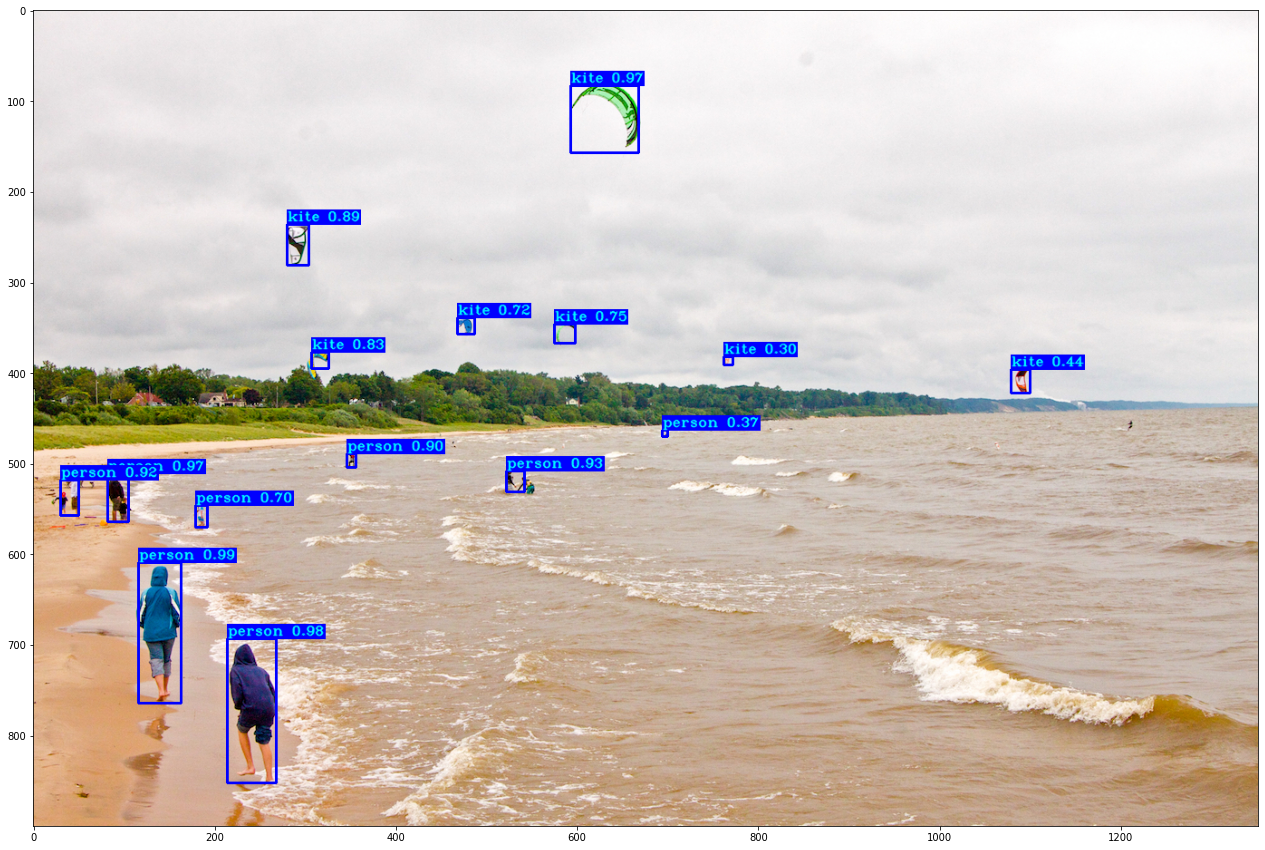

In [ ]:
image_path   = "./IMAGES/kite.jpg"

#image = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

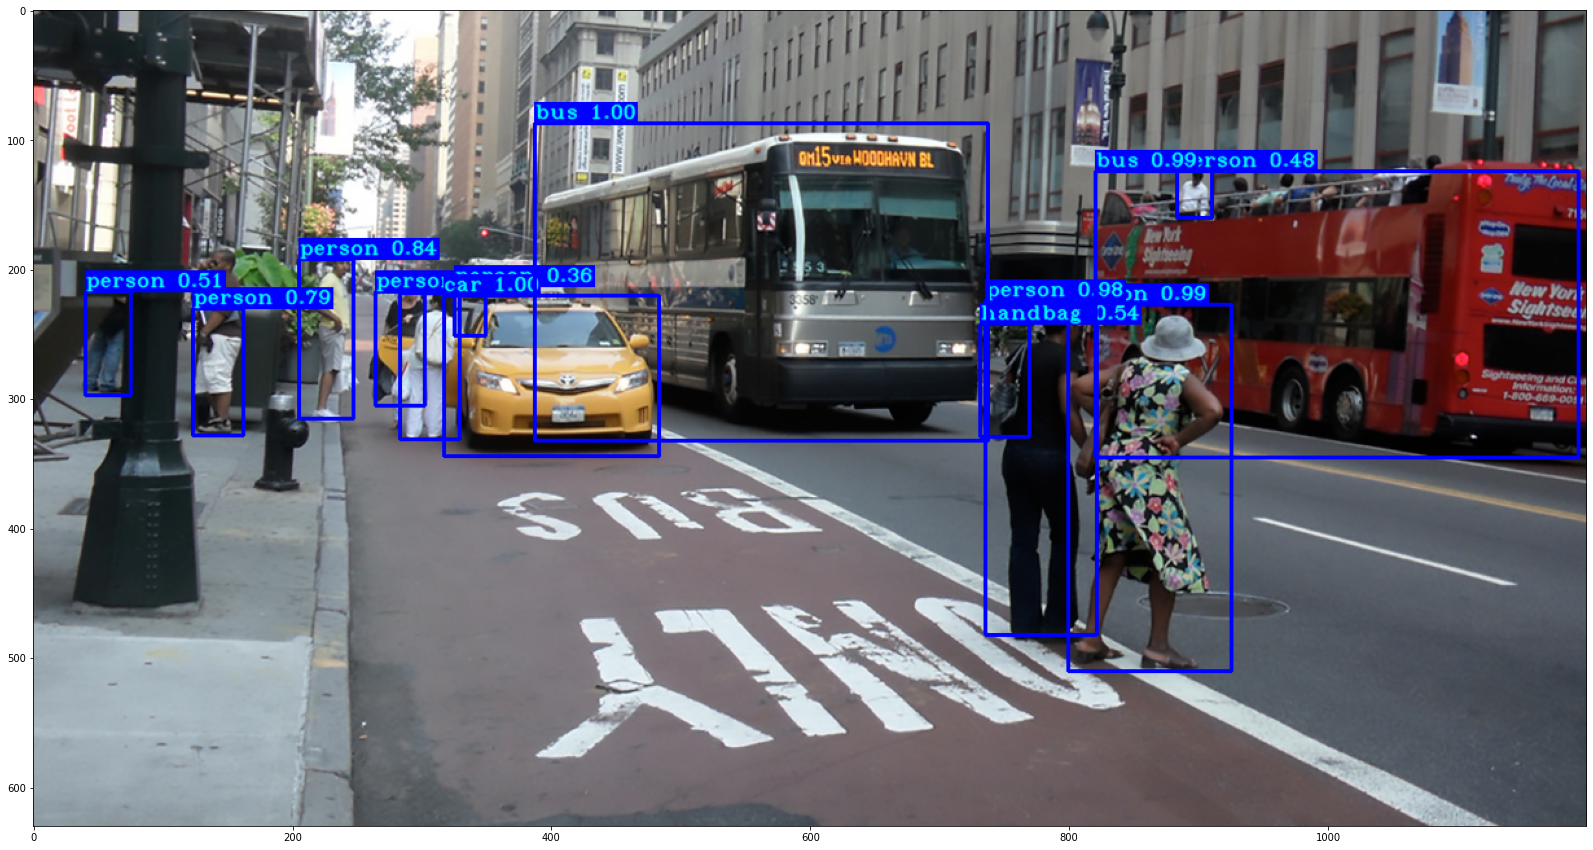

In [ ]:
image_path   = "./IMAGES/street.jpg"

#image = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

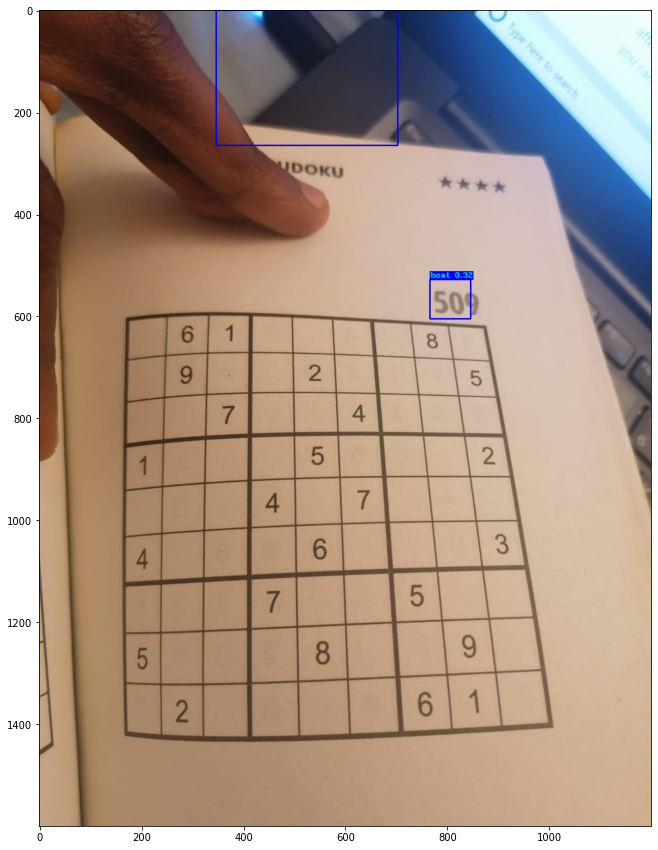

In [ ]:
image_path   = "./IMAGES/sudoku.jpeg"

image = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

# **Train custom model**

In [ ]:
%run mnist/make_data.py

Extracting all train files now...
Done!
Extracting all test files now...
Done!
=> /content/TensorFlow-2.x-YOLOv3-master/mnist/mnist_train/000001.jpg 28,279,42,293,2 62,374,76,388,6 294,165,336,207,2 206,317,290,401,0 113,231,197,315,3
=> /content/TensorFlow-2.x-YOLOv3-master/mnist/mnist_train/000002.jpg 100,344,142,386,1 137,22,193,78,6 348,361,390,403,9 25,27,67,69,9 147,317,189,359,3 109,102,165,158,1 250,185,362,297,9
=> /content/TensorFlow-2.x-YOLOv3-master/mnist/mnist_train/000003.jpg 246,369,288,411,8 267,75,351,159,5 59,170,171,282,2
=> /content/TensorFlow-2.x-YOLOv3-master/mnist/mnist_train/000004.jpg 118,371,132,385,8 67,26,89,48,6 269,380,283,394,4 131,338,159,366,8 208,106,250,148,5 211,245,239,273,6 135,235,163,263,5 166,361,194,389,6
=> /content/TensorFlow-2.x-YOLOv3-master/mnist/mnist_train/000005.jpg 342,211,364,233,3 205,133,317,245,8 50,65,134,149,1
=> /content/TensorFlow-2.x-YOLOv3-master/mnist/mnist_train/000006.jpg 133,304,147,318,4 158,50,200,92,9 50,190,106,246,3 

<Figure size 432x288 with 0 Axes>

In [ ]:
from train import *
tf.keras.backend.clear_session()
main()

Streaming output truncated to the last 5000 lines.
epoch:80 step:  117/250, lr:0.000010, giou_loss:   2.15, conf_loss:   0.02, prob_loss:   2.63, total_loss:   4.80
epoch:80 step:  118/250, lr:0.000010, giou_loss:   2.25, conf_loss:   0.07, prob_loss:   2.85, total_loss:   5.17
epoch:80 step:  119/250, lr:0.000010, giou_loss:   2.20, conf_loss:   0.02, prob_loss:   2.38, total_loss:   4.60
epoch:80 step:  120/250, lr:0.000010, giou_loss:   1.86, conf_loss:   0.13, prob_loss:   2.15, total_loss:   4.14
epoch:80 step:  121/250, lr:0.000010, giou_loss:   1.49, conf_loss:   0.08, prob_loss:   2.49, total_loss:   4.06
epoch:80 step:  122/250, lr:0.000010, giou_loss:   1.45, conf_loss:   0.02, prob_loss:   1.75, total_loss:   3.22
epoch:80 step:  123/250, lr:0.000010, giou_loss:   1.96, conf_loss:   0.14, prob_loss:   2.82, total_loss:   4.91
epoch:80 step:  124/250, lr:0.000010, giou_loss:   1.56, conf_loss:   0.02, prob_loss:   2.72, total_loss:   4.29
epoch:80 step:  125/250, lr:0.000010,

In [ ]:
pwd

'/content/TensorFlow-2.x-YOLOv3-master'

In [ ]:
%cd "/content/TensorFlow-2.x-YOLOv3-master/checkpoints"

/content/TensorFlow-2.x-YOLOv3-master/checkpoints


In [ ]:
!ls

checkpoint			   yolov3_custom.data-00001-of-00002
yolov3_custom.data-00000-of-00002  yolov3_custom.index


In [ ]:
%cp -av "/content/TensorFlow-2.x-YOLOv3-master/checkpoints" "/content/checkpoints"

'/content/TensorFlow-2.x-YOLOv3-master/checkpoints' -> '/content/checkpoints'
'/content/TensorFlow-2.x-YOLOv3-master/checkpoints/yolov3_custom.data-00000-of-00002' -> '/content/checkpoints/yolov3_custom.data-00000-of-00002'
'/content/TensorFlow-2.x-YOLOv3-master/checkpoints/yolov3_custom.data-00001-of-00002' -> '/content/checkpoints/yolov3_custom.data-00001-of-00002'
'/content/TensorFlow-2.x-YOLOv3-master/checkpoints/checkpoint' -> '/content/checkpoints/checkpoint'
'/content/TensorFlow-2.x-YOLOv3-master/checkpoints/yolov3_custom.index' -> '/content/checkpoints/yolov3_custom.index'


In [ ]:
%cp -av "/content/TensorFlow-2.x-YOLOv3-master/checkpoints/checkpoint" "/content/checkpoint"

'/content/TensorFlow-2.x-YOLOv3-master/checkpoints/checkpoint' -> '/content/checkpoint'


In [ ]:
%cp -av "/content/yolov3_custom.index" "/content/gdrive/My Drive/yolov3_custom.index" 

'/content/yolov3_custom.index' -> '/content/gdrive/My Drive/yolov3_custom.index'


In [ ]:
%cd "/content/TensorFlow-2.x-YOLOv3-master"

/content/TensorFlow-2.x-YOLOv3-master


In [ ]:
yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom") # use keras weights

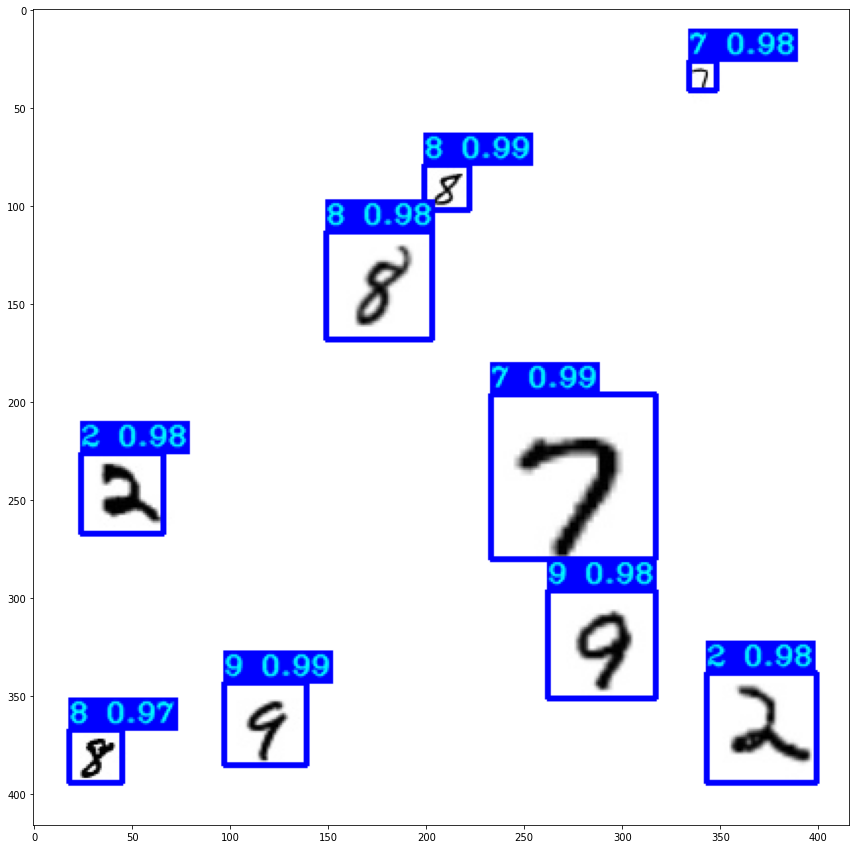

In [ ]:
image_path   = "/content/TensorFlow-2.x-YOLOv3-master/mnist/mnist_test/000001.jpg"
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

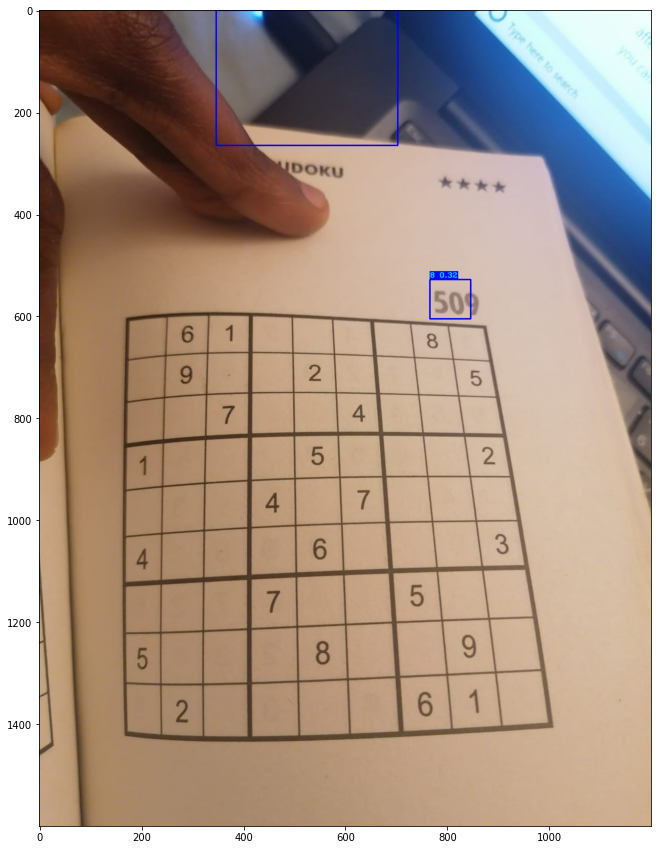

In [ ]:
image_path   = "/content/TensorFlow-2.x-YOLOv3-master/IMAGES/sudoku.jpeg"
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

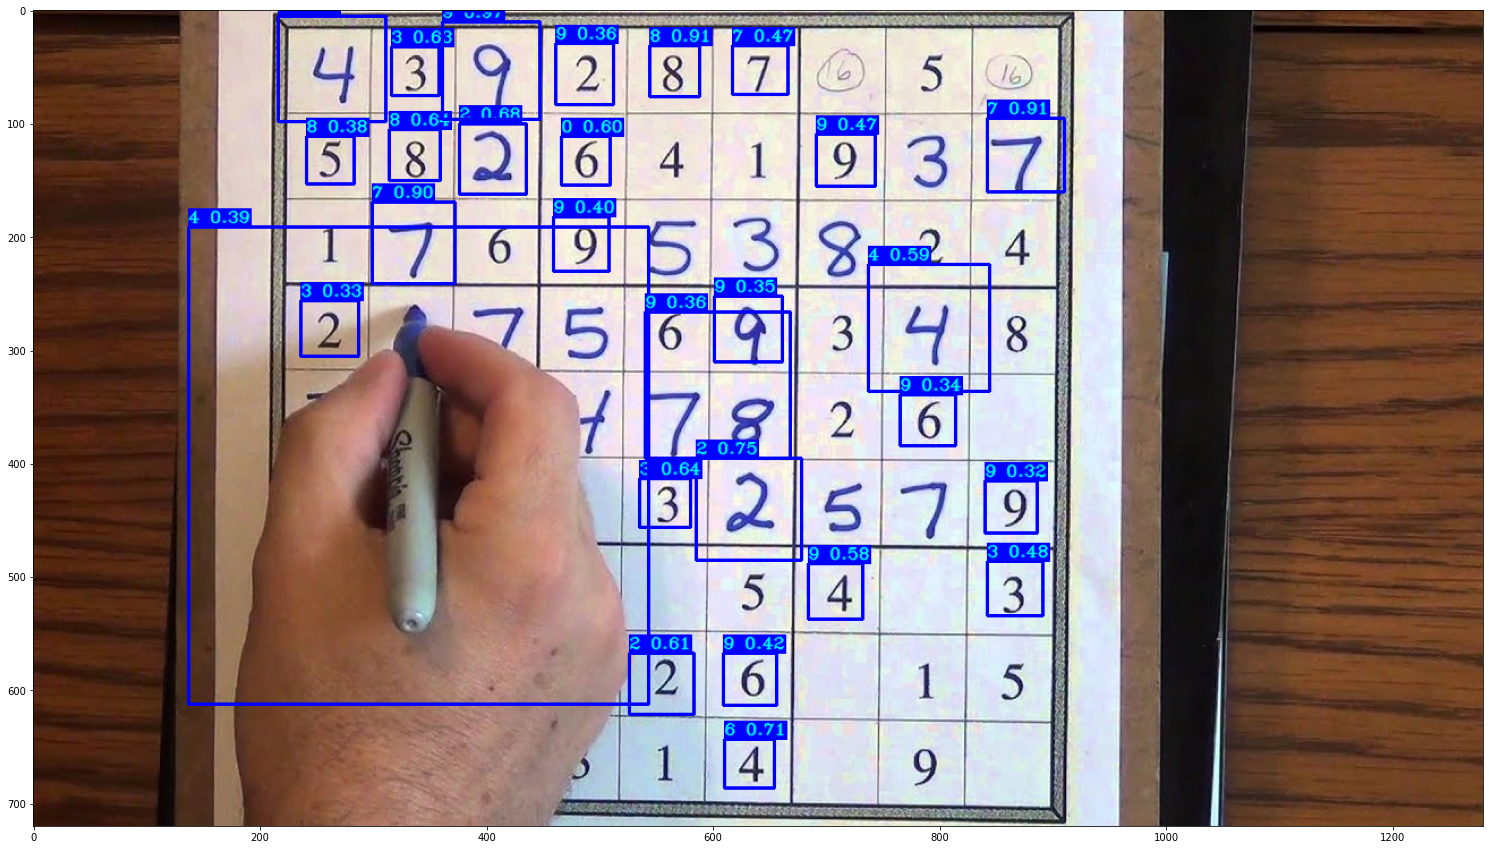

In [ ]:
image_path   = "/content/TensorFlow-2.x-YOLOv3-master/IMAGES/digits.jpg"
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

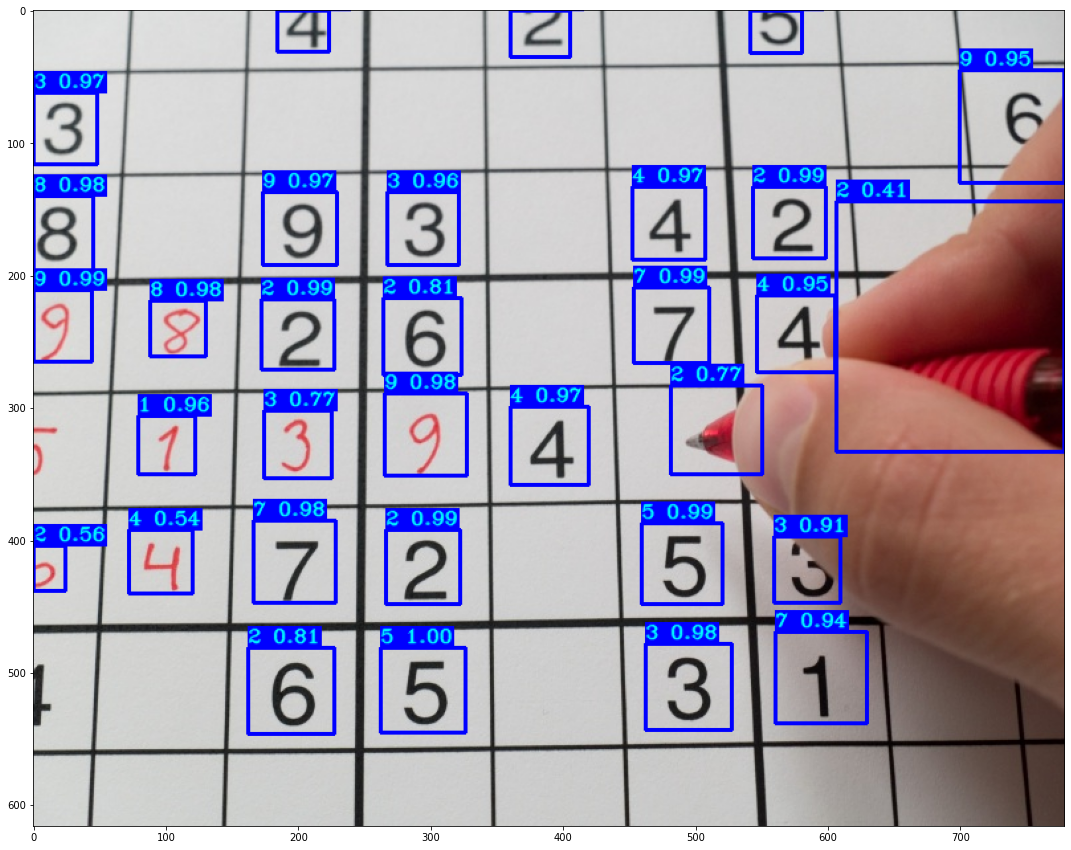

In [ ]:
image_path   = "/content/TensorFlow-2.x-YOLOv3-master/IMAGES/sudoku-tips.jpg"
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)